In [1]:
#user_id:用户ID
#order_dt:购买日期
#order_products:购买产品数量
#order_amount:购买金额
#数据时间:1997年1月-1998年6月用户数据行为，约6万条

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# 1. from datetime import datetime
# 作用：从 Python 的 datetime 模块导入 datetime 类
# 功能：
# 处理日期和时间数据
# 创建、操作和格式化日期时间对象
%matplotlib inline
# %matplotlib inline (Jupyter Notebook 魔法命令)
# 作用：在 Jupyter Notebook 中内嵌显示图表
# 功能特点：
# 不需要 plt.show() 命令
# 图表直接显示在代码单元格下方
# 生成的图表是静态图片（PNG格式）
plt.style.use('ggplot') #更改绘图风格，R语言绘图库的风格
# 作用：使用 ggplot 风格的绘图主题
# ggplot 风格特点：
# 源自 R 语言的 ggplot2 包
# 灰色背景+白色网格线
# 更高的颜色对比度
# 更粗的线条和更大的标记
# 更简洁的坐标轴和边框
# 其他流行风格：
# 'seaborn'：更现代的统计图表风格
# 'bmh'：Bayesian Methods for Hackers 风格
# 'dark_background'：深色背景风格
# 'fivethirtyeight'：FiveThirtyEight 新闻网站风格

In [3]:
#导入数据
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table('C:\\Users\\Administrator\\Desktop\\CDNOW_master.txt',names = columns,sep='\s+') #sep:'\s+‘：匹配任意空格
df.head()
#根据以下，得出要处理
#1、日期格式要转换
#2、存在一个用户一天购买多次的行为

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18768\3507728401.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table('C:\\Users\\Administrator\\Desktop\\CDNOW_master.txt',names = columns,sep='\s+') #sep:'\s+‘：匹配任意空格


,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.describe()
#根据一下数据，可得出：
#1、用户平均购买订单2.4个，标准差2.3，稍有波动，属正常。
#   然而75百分制分位数的时候，说明绝大多数购买量不多，围绕2-3个产品左右
#2、购买金额，反映出大部分订单消费金额集中在中小额。30-35左右

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [5]:
df.info()
#根据以下信息：
#1、无空值
#2、日期时间需要转换

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


数据预处理

In [7]:
#日期处理
df['order_date'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')
#format参数：按照指定的格式去匹配要转换的数据咧
#%Y--四位年份2001  %m--两位月份05    %d--两份日期31
#%y--两位年份01    %h--两位小时09    %M--两位分钟15   %s：两位秒

#将order_date转化成精度为月份的数据列
#df['month'] = df['order_date'].astype('datetime64[M]')  #[M]:控制转换后的精度#新版本已不支持
df['month'] = df['order_date'].dt.to_period('M')
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01
1,2,19970112,1,12.00,1997-01-12,1997-01
2,2,19970112,5,77.00,1997-01-12,1997-01
3,3,19970102,2,20.76,1997-01-02,1997-01
4,3,19970330,2,20.76,1997-03-30,1997-03


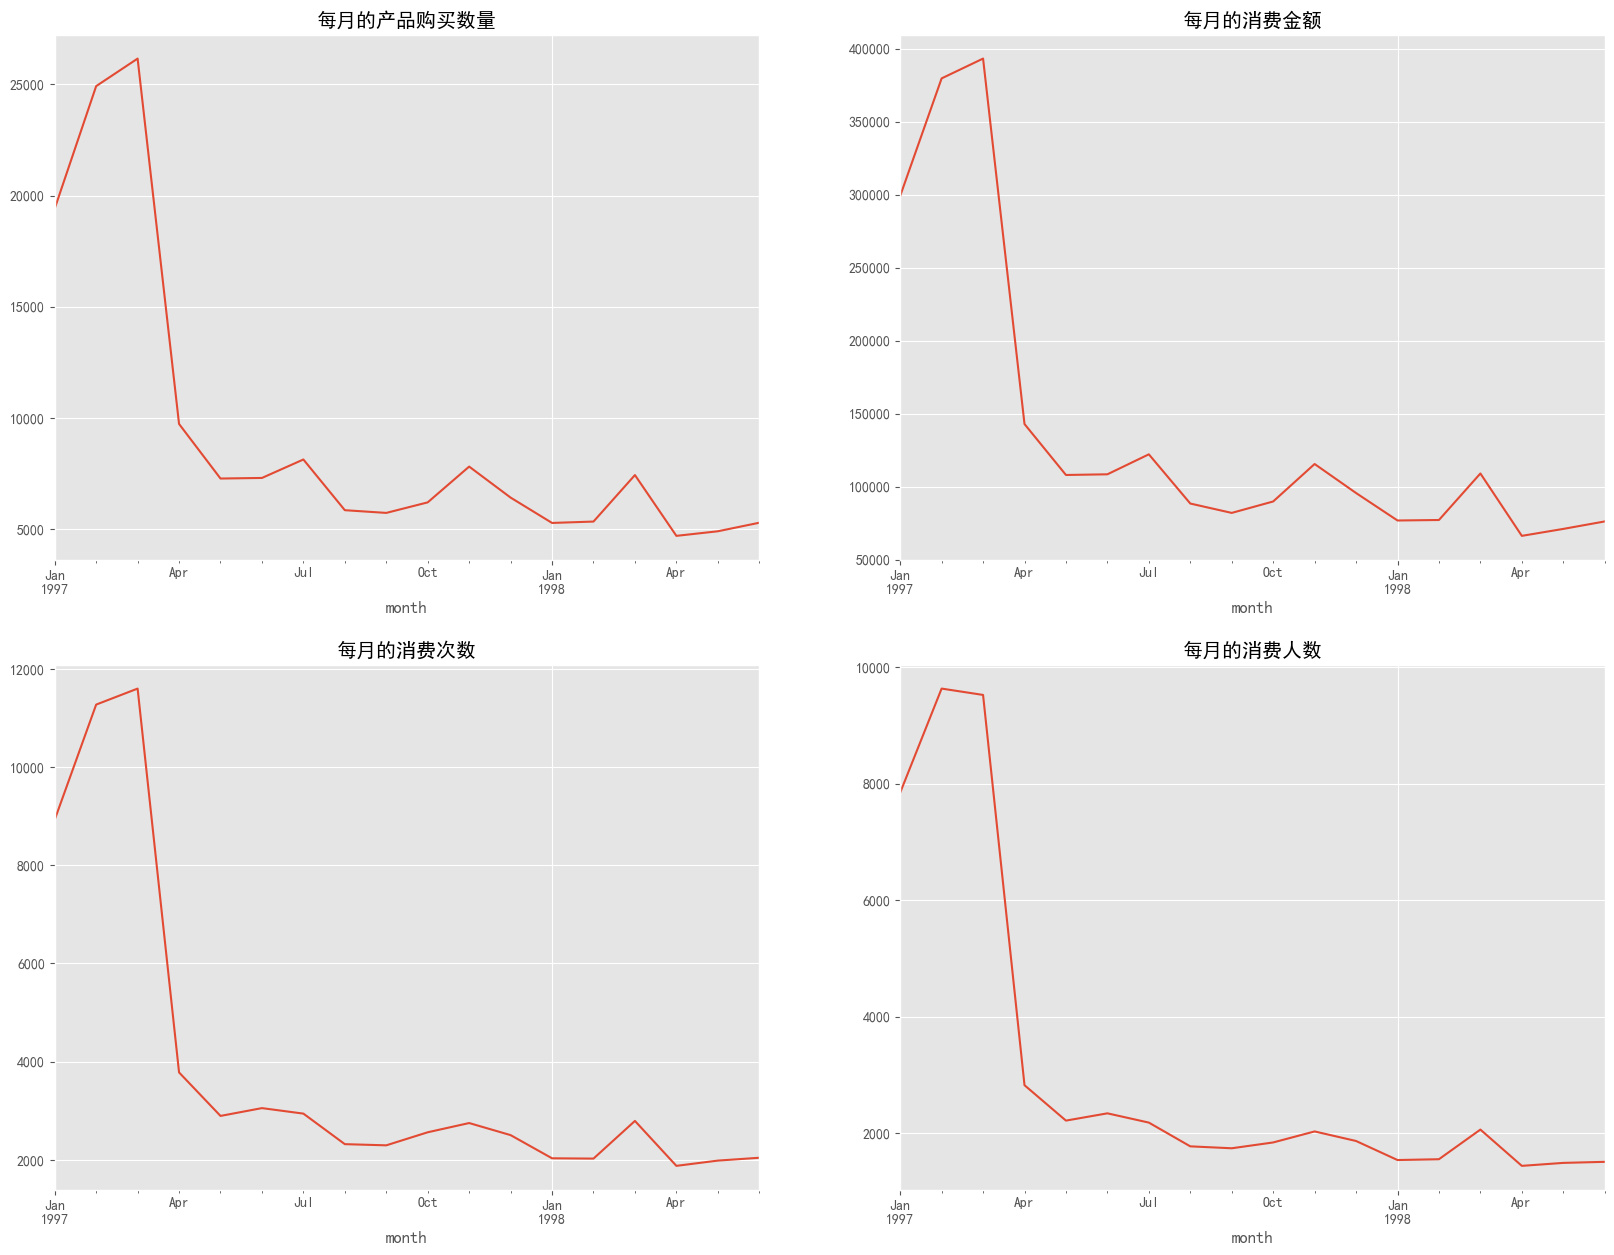

In [8]:
#用户整体消费趋势分析（按月份）
#按月份统计产品购买数量，消费金额，消费次数，消费人数

plt.rcParams['font.sans-serif'] = 'SimHei'##设置中文显示
plt.figure(figsize = (20,15))

#每月产品购买数量
plt.subplot(221)#两行两列，占据第一个位置
df.groupby(by='month')['order_products'].sum().plot()#默认折线图
plt.title('每月的产品购买数量')

#每月的消费金额
plt.subplot(222)#两行两列
df.groupby(by='month')['order_amount'].sum().plot()
plt.title('每月的消费金额')


#每月的消费次数
plt.subplot(223)#两行两列
df.groupby(by='month')['user_id'].count().plot()
plt.title('每月的消费次数')

#每月的消费人数（根据uid进行去重处理）
plt.subplot(224)#两行两列
df.groupby(by='month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot()
plt.title('每月的消费人数') 

plt.show()

#分析结果：
#图一可以得知，前三个月销量非常高，而后销量比较稳定，并且呈现下降趋势
#图二可以看出，依然前三个月消费金额比较高，与消费数量成正比例关系，三月份过分下降严重，并呈现下降趋势，思考原因：
#    1、跟月份有关，1，2，3处于春节前后；2、公司在1，2，3月份时候是否加大了促销力度
#图三可以看出，前三个月订单数在10000左右，后续月份平均订单数在2500左右
#图四可以看出，前三个月消费人数在8000-10000左右，后续平均消费人数2000不到


#总结：所有数据显示，97年前三个月消费事态异常，后续趋于常态化

###用户个体的消费分析

In [10]:
#1、消费金额、消费次数
col = ['user_id','order_products','order_amount']
user_grouped = df.groupby(by='user_id')[col].sum()
print(user_grouped.describe())
print('用户数量:',len(user_grouped))
#从用户的角度：用户数量23570个，每个用户平均购买7个CD，但是中位数只有3，并且最大购买量为1033，
#平均值大于中位数，属于古典的右偏分布（替购买量<7的用户背锅）
#
#从消费金额角度：平均用户消费106，中位数43，并且存在土豪用户13990，结合分位数和最大值的关系，平均数与75％分位数几乎相等，
#属于典型的右偏分布，说明存在小部分用户（后面的25%）高额消费（这些用户需要给金额<106的用户背锅，只有这样的才能使平均数维持在106）

            user_id  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   3.390107e+04        7.122656    106.080426
std    6.235396e+04       16.983531    240.925195
min    1.000000e+00        1.000000      0.000000
25%    9.028250e+03        1.000000     19.970000
50%    1.781750e+04        3.000000     43.395000
75%    3.721050e+04        7.000000    106.475000
max    3.154723e+06     1033.000000  13990.930000
用户数量: 23570


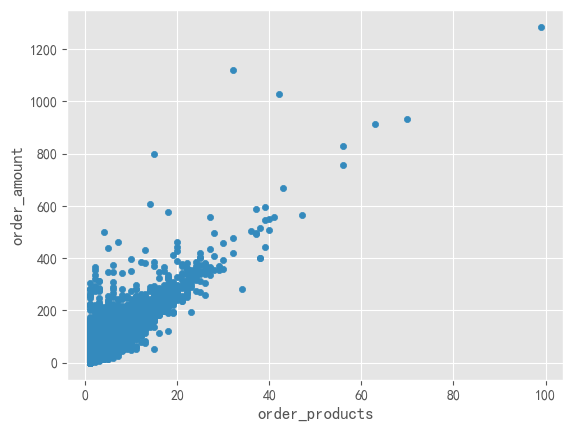

In [11]:
#绘制产品的购买数量与消费金额散点图
# user_grouped.plot(kind = 'scatter',x='order_products',y='order_amount')
df.plot(kind = 'scatter',x='order_products',y='order_amount')
plt.show()

#从图中得出，用户的消费行为和购买量呈现出线性的趋势，每个商品均价15左右[600/40=15]
#从订单的极值点比较少（消费金额>1000,或者购买量大于60），对于样本来说影响不大，可以忽略不计，

In [12]:
#用户消费行为
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01
1,2,19970112,1,12.00,1997-01-12,1997-01
2,2,19970112,5,77.00,1997-01-12,1997-01
3,3,19970102,2,20.76,1997-01-02,1997-01
4,3,19970330,2,20.76,1997-03-30,1997-03


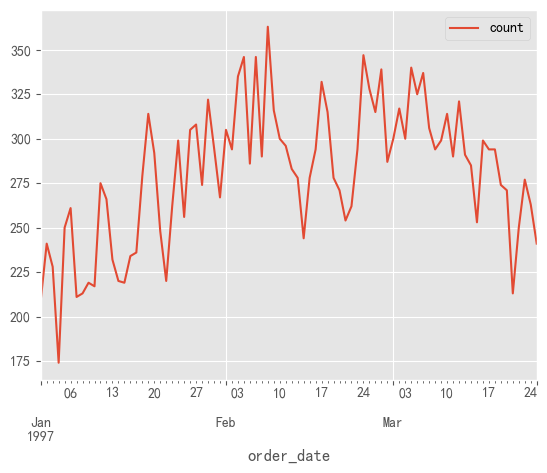

In [13]:
#1、首购时间kind='scatter'
#用户分组，取最小值，即为收购时间
#df.groupby(by='user_id')['order_date'].min().value_counts().plot(kind='scatter')
# 1. 获取每个用户的首次购买日期
first_purchase_dates = df.groupby('user_id')['order_date'].min()
# 2. 转换为DataFrame格式
date_counts = (
    first_purchase_dates
    .value_counts()             # 统计每日新增用户数
    .reset_index()              # 将索引转为列)
)
date_counts = date_counts.sort_values(by='order_date')
date_counts.plot(kind='line',x='order_date',y='count')
plt.show()
#根据曲线，首次购买的用户量在1月1号——2月10号呈明显上升趋势，后续逐步下降
#猜测：有可能公司产品的推广力度或者价格调整

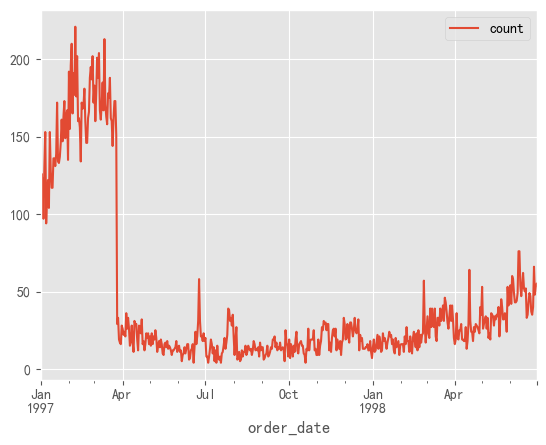

In [14]:
#2、最后一次购买
last_purchase_date = df.groupby(by='user_id')['order_date'].max()
date_counts = last_purchase_date.value_counts().reset_index()
date_counts = date_counts.sort_values(by = 'order_date')
date_counts.plot(kind = 'line',x ='order_date',y='count')
plt.show()

#有图可知，大多数用户购买时时间集中在前三个月，说明缺少忠诚用户；
##但是随着时间推移，最后一次购买商品的用户量呈现上升趋势
##猜测：这份数据选择的前三个月消费的用户在后面18个月的跟踪记录

###
RFM

In [17]:
# 透视表（Pivot Table）是数据分析中用于多维数据聚合和交叉分析--动态分布并且分类汇总---的核心工具。
# 在 Pandas 中，pivot_table() 函数提供了强大的透视表功能。--1、灵活性高；2、脉络清晰易于理解3、操作性强、报表神器
#透视表的使用
#index-->groupby
#value-->取出的数据列
#aggfunc->key值必须存在于value列中，并且必须跟随有效的聚合
rfm = df.pivot_table(index = 'user_id',
                    values = ['order_products','order_amount','order_date'],
                    aggfunc = {'order_date':'max',#最后一次购买
                               'order_products':'sum',#购买产品的数量
                               'order_amount':'sum'#消费总金额
                              }
                        )
# pd.pivot_table(
#     data,               # 原始DataFrame
#     values=None,        # 要聚合的数值列
#     index=None,         # 行分组键
#     columns=None,       # 列分组键
#     aggfunc='mean',     # 聚合函数
#     fill_value=None,    # 填充缺失值
#     margins=False,      # 是否添加总计行/列
#     margins_name='All'  # 总计行/列的名称
# )
rfm.head()


,order_amount,order_date,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [21]:
#rfm构建--r
rfm['order_date'].max()
#可以看到是时间戳，计算后要转类型

Timestamp('1998-06-30 00:00:00')

In [33]:
rfm['R'] = -(rfm['order_date'] - rfm['order_date'].max())#/np.timedelta64(1,'0')
rfm['R']

user_id
1       545 days
2       534 days
3        33 days
4       200 days
5       178 days
          ...   
23566   462 days
23567   462 days
23568   434 days
23569   462 days
23570   461 days
Name: R, Length: 23570, dtype: timedelta64[ns]

In [39]:
#每个用户最后一次购买时间-日期中的最大值，最后在转成天数，小数保留一位
rfm['R'] = -(rfm['order_date'] - rfm['order_date'].max())/np.timedelta64(1,'D') #取相差的天数，保留一位小数
# 4. / np.timedelta64(1, 'D')
# 作用：将时间差转换为天数（整数）
# 等价操作：.dt.days
rfm.head()

,order_amount,order_date,order_products,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [41]:
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace=True)
rfm.head()

,M,order_date,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [59]:
#自定义函数处理001
def rfm_func(x):    #x:分别代表每一列数据
    level = x.apply(lambda x:'1' if x>=1 else '0')
    label =level['R'] + level['F'] + level['M']  #举例:100 001
    d={
        '111':'重要价值客户',
        '101':'潜力客户',
        '100':'新客户',
        '011':'休眠客户',
        '000':'流失客户',
        '001':'高消费低频客户',
        '110':'高频低消费客户',
        '010':'需激活客户'
    }
    result = d[label]
    return result
# RFM类型	     R(最近购买)	F(购买频率)	M(购买金额)	二进制编码	   业务含义
# 重要价值客户	      1	       1	       1	      111	   高活跃+高频+高价值
# 潜力客户	          1	       0	       1	      101	   高活跃+低频+价值待提升
# 新客户	              1	       0	       0	      100	   高活跃+低频+低价值（待培养）
# 休眠客户	          0	       1	       1	      011	   低活跃+高频+高价值（需唤醒）
# 流失客户	          0	       0	       0	      000	   完全失活
# 高消费低频客户	      0	       0	       1	      001	   低活跃+低频+高价值
# 高频低消费客户	      1	       1	       0	      110	   高活跃+高频+低价值
# 需激活客户	          0	       1	       0	      010	   低活跃+高频+低价值



# 各类型战略价值矩阵
# 类型	战略价值	优先级	资源投入
# 111	★★★★★	最高	30%预算+专属团队
# 110	★★★★☆	高	25%预算+个性化推荐
# 011	★★★★☆	高	15%预算+召回活动
# 001	★★★☆☆	中	10%预算+高端推送
# 100	★★☆☆☆	中	10%预算+新人激励
# 010	★★☆☆☆	低	5%预算+常规触达
# 000	☆☆☆☆☆	最低	<1%预算+品牌维护


In [63]:
#计算方式：每一列数据减去数据所在的平均值，有正有负
        ##根据结果值与1比较，如果>=1，设置为1，否则为0
# 重要价值客户（111）：最近消费时间近、消费频次和消费金额都很高，必须是VIP啊！ 
# 重要保持客户（011）：最近消费时间较远，但消费频次和金额都很高，说明这是个一段时间没来的忠诚客户，我们需要主动和他保持联系。 
# 重要发展客户（101）：最近消费时间较近、消费金额高，但频次不高，忠诚度不高，很有潜力的用户，必须重点发展。 
# 重要挽留客户（001）：最近消费时间较远、消费频次不高，但消费金额高的用户，可能是将要流失或者已经要流失的用户，应当给予挽留措施。
#rfm['R']-rfm['R'].mean()
rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm.head(10)

,M,order_date,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,新客户
2,89.00,1997-01-12,6,534.0,新客户
3,156.46,1998-05-28,16,33.0,休眠客户
4,100.50,1997-12-12,7,200.0,流失客户
5,385.61,1998-01-03,29,178.0,休眠客户
6,20.99,1997-01-01,1,545.0,新客户
7,264.67,1998-03-22,18,100.0,休眠客户
8,197.66,1998-03-29,18,93.0,休眠客户
9,95.85,1998-06-08,6,22.0,流失客户


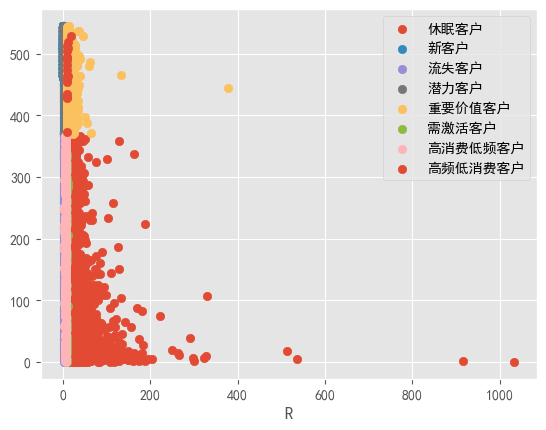

In [75]:
#rfm客户分层可视化--散点图
for label,grouped in rfm.groupby(by='label'):
    x = grouped['F']#单个用户购买数量
    y = grouped['R']#最近一次购买时间与98年7月相差的天数
    plt.scatter(x,y,label=label)
plt.legend()#显示图例
plt.xlabel('F')
plt.xlabel('R')
plt.show()

In [96]:
pivoted_counts = df.pivot_table(
    index = 'user_id',
    columns = 'month',
    values = 'order_dt',
    aggfunc = 'count',
)
p = pivoted_counts.fillna(0)
p

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
#由于浮点数值不直观，并且需要转换成是否消费过即可，用0、1表示
df_purchase = p.applymap(lambda x:1 if x>0 else 0)
#apply:作用与dataframe数据中的一行或一列数据
#applimap：作用与dataframe数据中的每一个元素
#map:本身是一个series的函数，在df结构中无法受用map函数，map函数作用于series中的每一个元素
df_purchase.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18768\2238967600.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_purchase = p.applymap(lambda x:1 if x>0 else 0)


month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [88]:
#判断是否是新用户、活跃用户、不活跃用户、回流用户
def active_status(data):#data:整行数据，共18列
    status = []#负责存储18个月：unreg|new|active|unactive|return
    for i in range(18):
        #本月有消费
        if data[i] == 0:
                if len(status) ==0:# 前面没有任何记录（97年1月份）
                    status.append('unreg')
                else:#开始判断上一个状态、
                    if status[i-1] == 'unreg':#一直未消费过
                        status.append('unreg')
                    else:#unreg|new|active|unactive|return
                        status.append('unactive')#不管上个月是否消费过，本月都不是活跃用户  
                pass
        #本月没有消费 == 1
        else:
            if len(status) == 0:#前面没有任何记录（97年1月份）
                status.append('new')#第一次消费
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unrge':
                    status.append('new')#第一次消费
                else:#new|active|return =1
                    status.append('active')
    return pd.Series(status,df_purchase.columns)#值status,列名df_purchase中的列名
    
purchase_states = df_purchase.apply(active_status,axis=1)#得到用户分层结果
purchase_states.head(20)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18768\3801572347.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i] == 0:


month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
6,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
7,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive
8,new,active,unactive,unactive,unactive,return,active,unactive,unactive,unactive,return,active,unactive,unactive,return,unactive,unactive,unactive
9,new,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return


In [92]:
#用nan替换unreg
purchase_state_ct = purchase_states.replace('unreg',np.NAN).apply(lambda x:pd.value_counts(x))
purchase_state_ct.head(60)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18768\3925605026.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  purchase_state_ct = purchase_states.replace('unreg',np.NAN).apply(lambda x:pd.value_counts(x))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18768\3925605026.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  purchase_state_ct = purchase_states.replace('unreg',np.NAN).apply(lambda x:pd.value_counts(x))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18768\3925605026.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  purchase_state_ct = purchase_states.replace('unreg',np.NAN).apply(lambda x:pd.value_counts(x))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18768\3925605026.py:2: FutureWarn

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
active,NaN,9633.0,8929.0,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595.0,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046.0,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


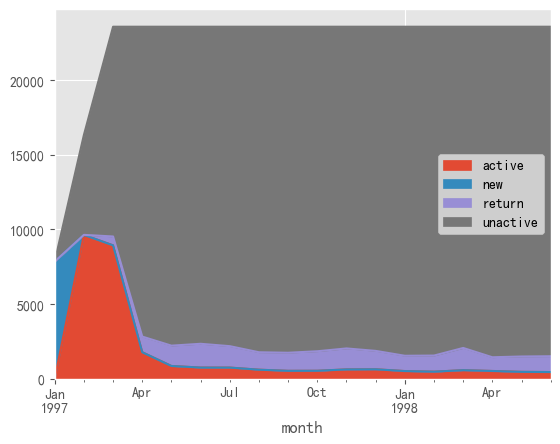

In [102]:
purchase_state_ct.T.fillna(0).plot.area()#行列变换
plt.show()
#前三个月可知，红色活跃用户和蓝色新用户，占比较大
#四月份过后，新用户和活跃用户，开始下降，并且呈现稳定趋势
#回流用户主要在4月之后，呈现稳定趋势，是网站的重要客户

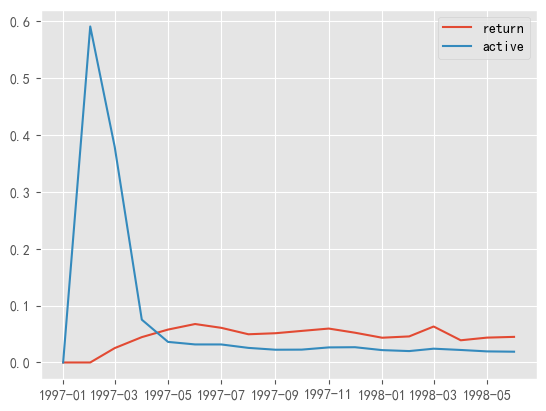

In [144]:
#回流用户占比
rate = purchase_state_ct.T.fillna(0).apply(lambda x:x/x.sum(), axis=1).reset_index()
# plt.plot(rate['month'],rate['return'],label='return')
# 原因说明：
# 你的 rate['month'] 列是 Pandas 的时间周期类型（如 2023-01 这样的月度数据）
# Matplotlib 的 plot() 函数需要数值或字符串类型
# 使用 .dt.to_timestamp() 可以转换为 Matplotlib 能识别的标准时间格式
plt.plot(rate['month'].dt.to_timestamp(),rate['return'],label='return')
plt.plot(rate['month'].dt.to_timestamp(),rate['active'],label='active')
plt.legend()
plt.show()
#回流用户：前五个月，回流用户上涨，过后呈现下降趋势，平均维持在5％比例
#活跃用户：前三个月用户大量增长，猜测由于活动吸引很多新用户导致，5月份过后开始下降，平均维持在2.5％左右
#正常
#网站运营稳定后，回流用户占比大于活跃用户

In [150]:
#shift函数：将函数移动到一定的位置
#计算购买时间差（购买时间差值）
order_diff = df.groupby(by='user_id').apply(lambda x:x['order_date']-x['order_date'].shift())#当前订单日期-上一次订单日期
order_diff.info()

<class 'pandas.core.series.Series'>
MultiIndex: 69659 entries, (1, 0) to (23570, 69658)
Series name: order_date
Non-Null Count  Dtype          
--------------  -----          
46089 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 4.2 MB


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18768\296348746.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  order_diff = df.groupby(by='user_id').apply(lambda x:x['order_date']-x['order_date'].shift())#当前订单日期-上一次订单日期


In [152]:
order_diff.describe()

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_date, dtype: object

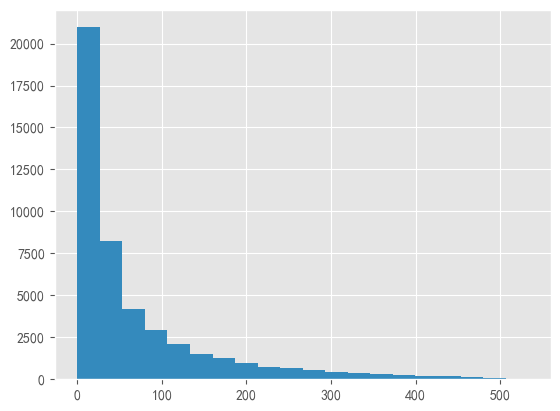

In [156]:
order_diff.dt.days.hist(bins=20)#影响柱子的宽度，每个柱子宽度=（最大值-最小值）/bins
plt.show()
#得知：1、平均消费周期68天
#2、大多数用户消费周期低于100天
#3、呈现典型的长尾分布，只有小部分消费周期在200天以上（不积极消费的用户）
##对策：可以在这批用户消费后3天左右进行电话回访或者短信赠送优惠劵活动，增大消费频率

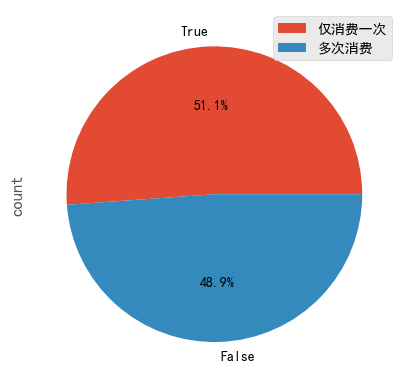

In [166]:
#计算方式：用户第一次购买日期 - 第一次购买日期。如果差值==0，说明用户仅购买了一次
# agg() 是 Pandas 中用于数据聚合的核心函数，全称是 aggregate()（也可简写为 agg）。
# 它允许你同时对多个列应用多种聚合计算，是数据分析中处理分组数据的利器。
user_life = df.groupby('user_id')['order_date'].agg(['min','max'])
(user_life['max']==user_life['min']).value_counts().plot.pie(autopct='%1.1f%%')#格式化成1位小数
# (user_life['max'] == user_life['min'])    # 1. 识别一次性用户
# .value_counts()                          # 2. 统计两类用户数量
# .plot.pie(                               # 3. 绘制饼图
#     autopct='%1.1f%%',                   # 显示百分比（如 30.0%）
#     labels=['一次性用户','忠实用户'],      # 自定义标签
#     colors=['#ff9999','#66b3ff'],        # 自定义颜色
#     explode=(0.1, 0),                    # 突出一次性用户
#     title='用户活跃类型分布'               # 添加标题
# )
plt.legend(['仅消费一次','多次消费'])
plt.show()
#一半以上的用户仅仅消费一次，说明运营不利，留存率不好

In [172]:
(user_life['max']-user_life['min']).describe()#生命周期分析
#用户平均生命周期是124天
#中位数==0 --验证了大多数用户只消费了一次，为低质量用户
#75%分位数以后的用户，生命周期》294天，属于核心用户，需要着重维持
#前三个月的新用户数据，所以分析的是这些新用户的生命周期

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object

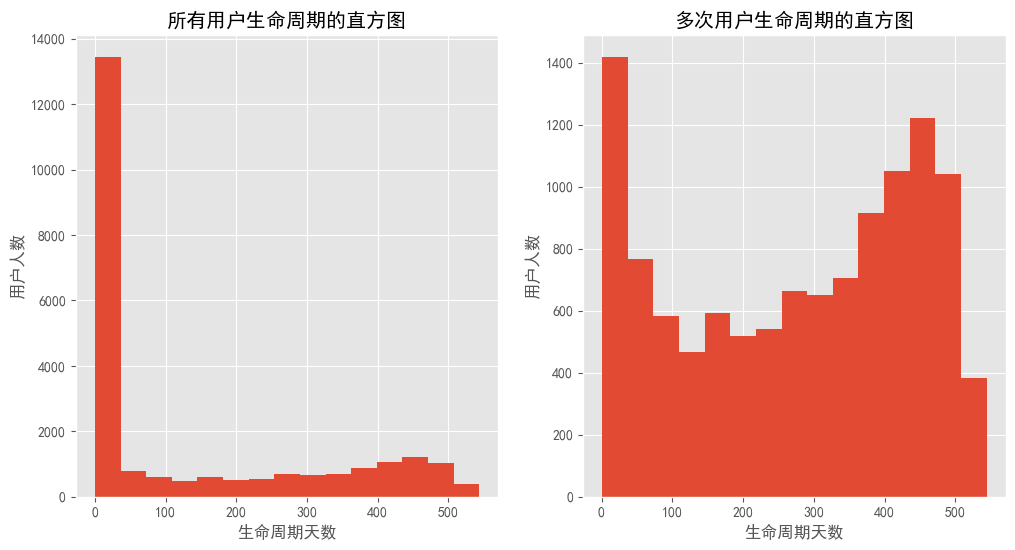

In [204]:
#绘制所有用户生命周期直方图+多次消费
plt.figure(figsize=(12,6))
plt.subplot(121)
(user_life['max']-user_life['min']).dt.days.hist(bins=15)
plt.title('所有用户生命周期的直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

plt.subplot(122)
u_1 = (user_life['max']-user_life['min']).reset_index()[0].dt.days
u_1[u_1>0].hist(bins=15)
plt.title('多次用户生命周期的直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

plt.show()

In [206]:
##由以上的图
#对比可知：第二幅图滤掉了生命周期为0的用户，呈现双峰结构
#虽然图二中还有一部分的用户生命周期趋于0天，但是比第一幅图好很多，虽然进行了多次消费，但是不成长期
#来消费，属于普通用户，可针对性进行营销推广活动
#少部分用户生命周期集中在300-500天，属于忠诚用户，要大理维护



# 这是用户生命周期天数分布直方图，横坐标是生命周期天数，纵坐标为对应天数的用户人数，可从分布特征、关键区间、业务启示三方面解读：
# 分布特征：
#呈现 “双峰 + 波动” 形态，0 天附近（推测是短期生命周期，如首次使用后很快流失 ）和 400 - 500 天区间（相对长期留存用户 ）人数集中，
#中间天数（100 - 300 天）有明显波谷，反映用户留存 “两头多、中间少” 的分层特征。
# 关键区间：
#0 天附近高人数，说明大量用户生命周期短，可能是获客环节（如推广吸引非精准用户）或首体验（产品首印象、流程复杂）
#存在问题；400 - 500 天的用户是核心留存群体，需挖掘其留存动因（如功能依赖、情感连接 ）。
# 业务启示：
#针对短期流失用户，优化获客精准度（圈定匹配人群）、简化首流程；对长期留存用户，通过专属权益、深度功能绑定增强粘性，
#同时分析中间波谷原因（如体验断层、竞品吸引 ），填补留存漏洞 ，提升整体用户生命周期价值。

#复购率和回购率分析

In [237]:
#复购率分析
#计算方式：在自然月内，购买多次的用户在总消费人数中的占比（倘若客户在同一天消费了多次，也称为复购用户)
#三种消费者：
#1、消费记录>=2次
#2、消费中的人数
#3、本月无消费的记录

#复购用户:1
#非复购用户：0
#自然月没有消费记录用户：NAN
purchase_r = pivoted_counts.applymap(lambda x: 1 if x>1  else 0 if x==1 else np.NAN)
#利用NAN不参与计算的特性
purchase_r.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18768\3047161666.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  purchase_r = pivoted_counts.applymap(lambda x: 1 if x>1  else 0 if x==1 else np.NAN)


month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


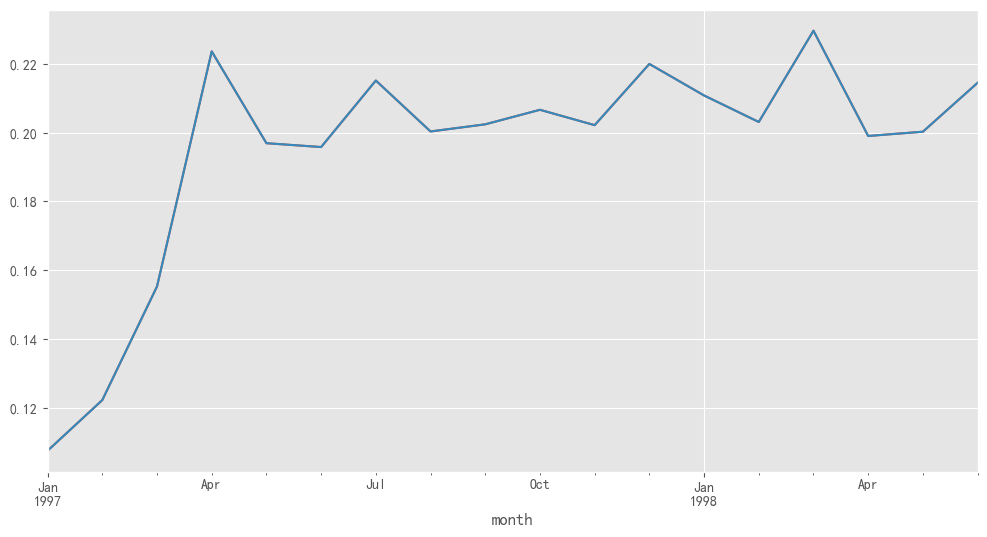

In [243]:
#purchase_r.sum:求复购用户
#purchase_r.count:求所有用户
(purchase_r.sum()/purchase_r.count()).plot(figsize=(12,6))
plt.show()
#前三个月复购率上升，后续趋于平稳维持在20%-22%之间
#分析前三个月复购率低的原因，可能是因为大批新用户仅仅购买一次造成的

回购分析

In [250]:
#计算方式：在一个时间窗口内进行了消费，在在下一个窗口内又进行了消费

#1、回购用户
#0、非回购用户（当月消费了，下个未消费）
#NAN、当前月份未消费
def purchase_back(data):
    status = [] #存储用户回购率状态
    for i in range(17):#17
        if data[i] ==1:#当前月份消费了
            if data[i+1] == 1:
                status.append(1)#回购用户
            elif data[i+1] == 0:#下个月未消费
                status.append(0)
        else:#当前月份未进行消费
            status.append(np.NAN)
    status.append(np.NAN)#填充最后一列数据
    return pd.Series(status,df_purchase.columns)
    
purchase_b = df_purchase.apply(purchase_back,axis = 1)
purchase_b.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18768\1473399781.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i] ==1:#当前月份消费了
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18768\1473399781.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i+1] == 1:
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18768\1473399781.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data[i+1] == 0:#下个月未消费


month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


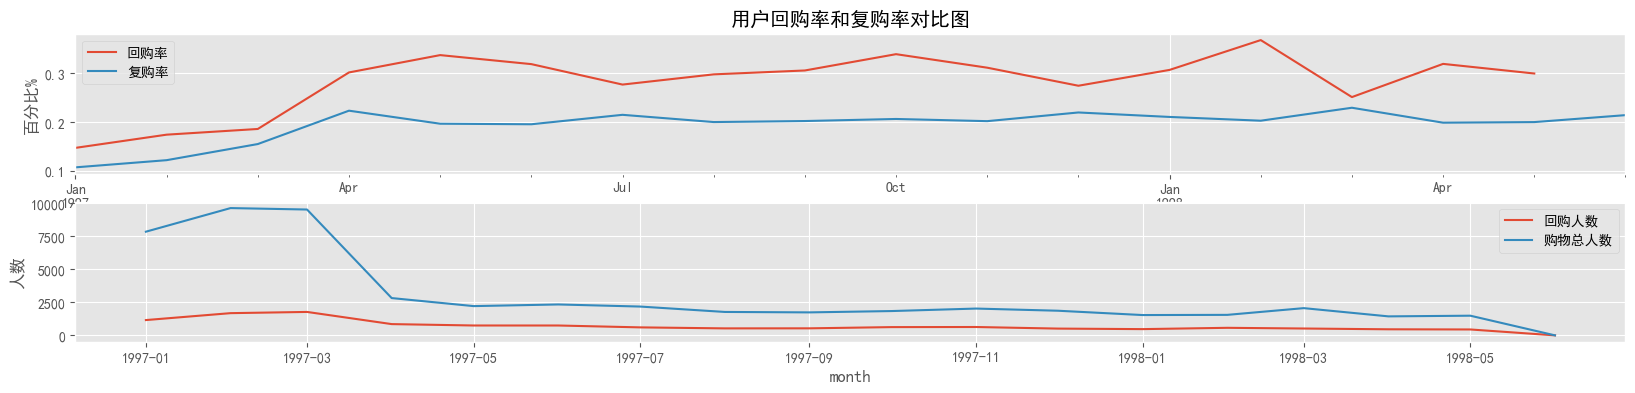

In [277]:
#回购率可视化
plt.figure(figsize=(20,4))

#回购率
plt.subplot(211)
#回购用户/总的用户数
(purchase_b.sum()/purchase_b.count()).plot(label='回购率')
#复购率
(purchase_r.sum()/purchase_r.count()).plot(label='复购率')
plt.legend()
plt.ylabel('百分比%')
plt.title('用户回购率和复购率对比图')
#回购率可知，平稳后在30%左右，波动性较大
#复购率可知，复购率低于回购率，平稳后在20%左右，波动较小
#前三个月不管是回购率还是复购，都是呈现上升趋势，说明新用户需要一定时间来变成复购或者回购用户
#结合新老用户分析，新客户忠诚度远低于老客户忠诚度


#回购人数与购物人数
plt.subplot(212)
# 获取索引并转换为合适格式
time_index = purchase_b.columns
# 方法1：转换为时间戳（推荐）
x_values = time_index.to_timestamp()
plt.plot(x_values,purchase_b.sum(),label='回购人数')
plt.plot(x_values,purchase_b.count(),label='购物总人数')
plt.xlabel('month')
plt.ylabel('人数')
plt.legend()

plt.show()


#前三个月购物总人数远远大于回购人数，主要是因为很多新用户在1月份进行了首次购买
#三个月后，回购人数和购物总人数开始稳定，回购人数稳定在1000左右，购物总人数在2000左右

# 八、结论
## 1.整体趋势:按年的月份趋势销量和销售额在1-3月份相对极高，然后骤降，原因可能跟这段时间的大力促销或与商品的季度属性有关。
## 2.用户个体特征:每笔订单的金额和商品购买量都集中在区间的低段水平，都是小金额小批量进行购买，此类交易群体，可在丰富产品线和增加促销活动提高转换率和购买率。
## 3.大部分用户的消费总额和购买总量都集中刚在低段，长尾分布，这个跟用户需求有关，可以对商品进行多元文化价值的赋子，增强其社交价值属性，提高用户的价值需求。
## 4.用户的消费周期:有二次以上消费的用户，平均68天，所以在50天到60天期间，应该对这批用户进行刺激召回，细致点，比10天回复满意度，30天发放优惠券，55天的时候提醒优惠券的使用。
## 5.用户的生命周期:有二次及以上消费的用户的平均生命周期是276天。用户的生命周期分别在20天内与400至500天间，应该在20天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期;在100至400天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费。
## 6.新客户的复购率约为12%，老客户的复购率在20%左右;新客户的回购率在15%左右，老客户的回购率在30%左右，需要营销策略积极引导其再次消费及持续消费。
## 7.用户质量:用户个体消费有一定规律性，大部分用户的消费集中在2000以下，用户消费反应了2/8法则，消费排名前20%的用户贡献了80%的消费额。所以说，狠抓高质量用户是万古不变的道理，这些高质量客户都是“会员”类型，需要专门为会员优化购物体验，比如专线接听、特殊优惠等等。

In [ ]:
#方法总结
#1、针对用户进行按照做整体和个体分析，主要维度是人数，消费金额，购买量
#2、消费分析：首购时间，最后一次购买时间、相邻两个购物时间间隔、用户分层（RFM模型+数据透视表），分析维度主要是新用户，活跃用户，不活跃用户流失分析，
#回流用户占比
#3、复购率和回购率进行分析